In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nasa-cmaps/CMaps/RUL_FD002.txt
/kaggle/input/nasa-cmaps/CMaps/test_FD003.txt
/kaggle/input/nasa-cmaps/CMaps/Damage Propagation Modeling.pdf
/kaggle/input/nasa-cmaps/CMaps/readme.txt
/kaggle/input/nasa-cmaps/CMaps/train_FD003.txt
/kaggle/input/nasa-cmaps/CMaps/test_FD004.txt
/kaggle/input/nasa-cmaps/CMaps/train_FD004.txt
/kaggle/input/nasa-cmaps/CMaps/x.txt
/kaggle/input/nasa-cmaps/CMaps/test_FD002.txt
/kaggle/input/nasa-cmaps/CMaps/train_FD001.txt
/kaggle/input/nasa-cmaps/CMaps/train_FD002.txt
/kaggle/input/nasa-cmaps/CMaps/RUL_FD001.txt
/kaggle/input/nasa-cmaps/CMaps/RUL_FD004.txt
/kaggle/input/nasa-cmaps/CMaps/RUL_FD003.txt
/kaggle/input/nasa-cmaps/CMaps/test_FD001.txt
/kaggle/input/nasa-cmaps/cmaps/CMaps/RUL_FD002.txt
/kaggle/input/nasa-cmaps/cmaps/CMaps/test_FD003.txt
/kaggle/input/nasa-cmaps/cmaps/CMaps/Damage Propagation Modeling.pdf
/kaggle/input/nasa-cmaps/cmaps/CMaps/readme.txt
/kaggle/input/nasa-cmaps/cmaps/CMaps/train_FD003.txt
/kaggle/input/nasa-cmaps/cmaps/CM

In [2]:
!git clone https://github.com/lucas-fpaiva/estatistica_pes.git

Cloning into 'estatistica_pes'...
remote: Enumerating objects: 43, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 43 (delta 14), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (43/43), 200.36 KiB | 1.16 MiB/s, done.


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import mannwhitneyu

In [4]:
colors = [(0.3764705882352941, 0.3764705882352941, 0.3764705882352941, 1),
                 (0, 0, 0.6470588235294118, 1),
                 (0, 0.6666666666666666, 0.6274509803921569, 1),
                 (0, 0.9764705882352941, 0, 1),
                 (0.8431372549019608, 0, 0, 1),
                 (1.0, 0.807843137254902, 0.0392156862745098, 1),
                 (0.1, 0.1, 0.1, 1)]

In [5]:
data = pd.read_csv('./estatistica_pes/output_2.csv',index_col=None)

In [6]:
data.head()

,Unnamed: 0,Time_LSTM,Erro_LSTM,Time_MLP,Erro_MLP
0,0,0.462626,9.034615,0.031247,5.229546
1,1,0.037900,15.535492,0.047272,30.973679
2,2,0.028168,23.968708,0.015625,48.150089
3,3,0.033824,12.212555,0.046931,43.684631
4,4,0.030592,19.605598,0.016022,36.840889


## Comparando o desempenho dos modelos LSTM e MLP

1. Análise de normalidade
2. Teste de comparação

## 1. Normalidade 

In [7]:
def plot_hist(data, cols, color_hist, max_hist=[30,30]):
    fig, axes = plt.subplots(1, 2,figsize=(15*len(cols),10))
    
    n=0
    for col in cols:
    
        sns.histplot(data, x=col,color=color_hist[n],ax=axes[n])
        axes[n].vlines(data.mean()[col], 0, max_hist[n], colors=colors[3],linestyles='dashed', linewidth=5)#  'dashed', 'dashdot', 'dotted'
        axes[n].vlines(data.median()[col], 0, max_hist[n], colors=colors[4],linestyles='dashed', linewidth=5)
        axes[n].vlines(data.mode()[col], 0,max_hist[n], colors=colors[6],linestyles='dashed', linewidth=1)

        axes[n].set_xlabel(col,fontsize=18)
        axes[n].set_ylabel('Quantidade',fontsize=18)

        axes[n].legend(["Media","Mediana",'Moda',col],fontsize=18)
        
        n=n+1

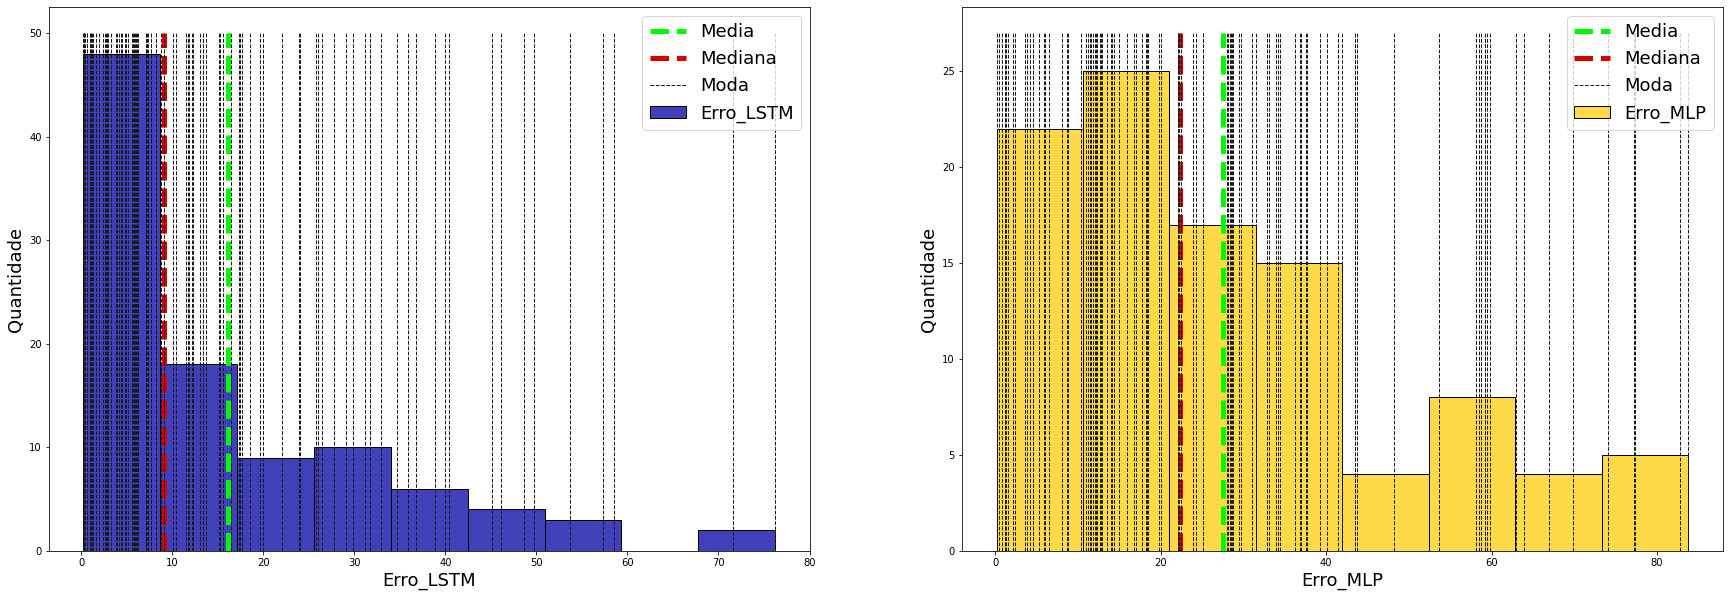

In [8]:
plot_hist(data, cols=['Erro_LSTM','Erro_MLP'],color_hist=[colors[1],colors[-2]],max_hist=[50,27])

In [9]:
k2, p = stats.normaltest(data['Erro_LSTM'].values)
print("Erro_LSTM: ", p)

k2, p = stats.normaltest(data['Erro_MLP'].values)
print("Erro_MLP: ", p)

Erro_LSTM:  1.5910173249429277e-07
Erro_MLP:  0.004837882181093637


## 2. Comparação

(0.0, 90.0)

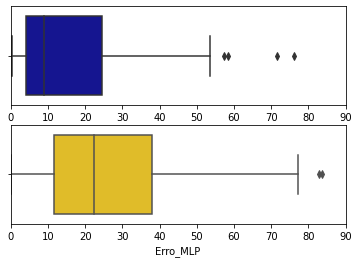

In [10]:
fig, axes = plt.subplots(2,1)
sns.boxplot(x='Erro_LSTM', data=data,ax=axes[0],color = colors[1])
axes[0].set_xlim(0, 90)
sns.boxplot(x='Erro_MLP', data=data,ax=axes[1],color=colors[-2])
axes[1].set_xlim(0, 90)

(0.0, 0.5)

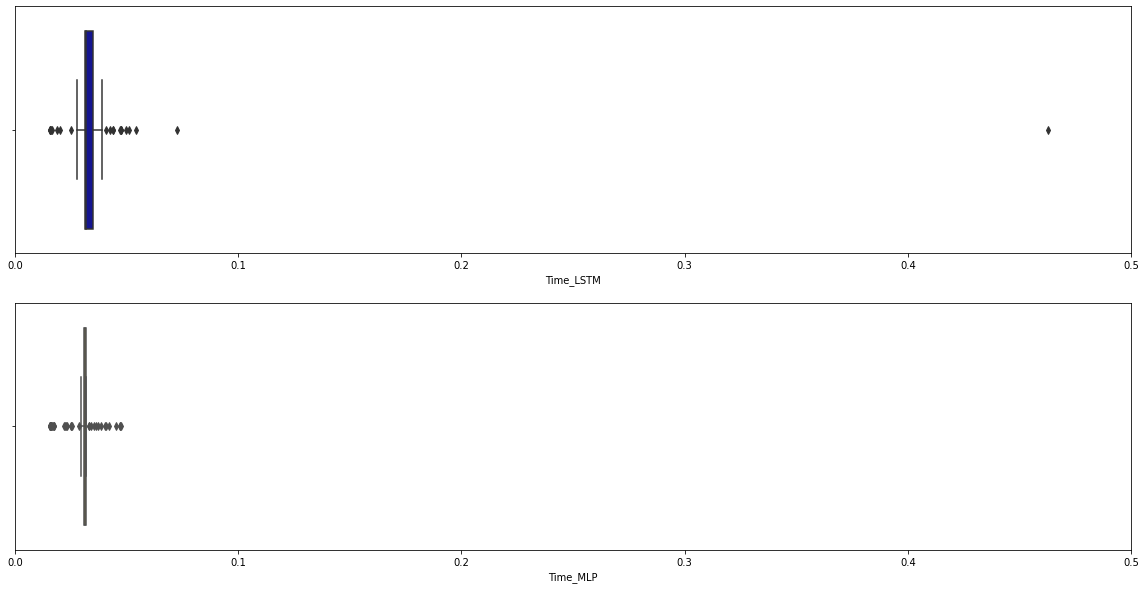

In [11]:
fig, axes = plt.subplots(2,1,figsize=(20,10))
sns.boxplot(x='Time_LSTM', data=data,ax=axes[0],color = colors[1])
axes[0].set_xlim(0, 0.5)
sns.boxplot(x='Time_MLP', data=data,ax=axes[1],color=colors[-2])
axes[1].set_xlim(0, 0.5)

<AxesSubplot:xlabel='Time_MLP'>

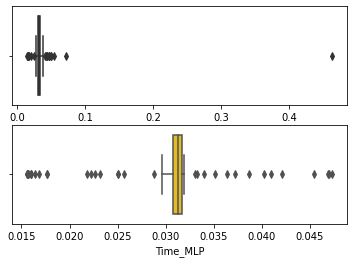

In [12]:
fig, axes = plt.subplots(2,1)
sns.boxplot(x='Time_LSTM', data=data,ax=axes[0],color = colors[1])
# plt.x_lim=[0,100]
sns.boxplot(x='Time_MLP', data=data,ax=axes[1],color=colors[-2])


In [13]:
k2, p = stats.normaltest(data['Time_LSTM'].values[1:])
print("Time_LSTM: ", p)

k2, p = stats.normaltest(data['Time_MLP'].values)
print("Time_MLP: ", p)

Time_LSTM:  1.0134097389993664e-09
Time_MLP:  0.03931744881233144


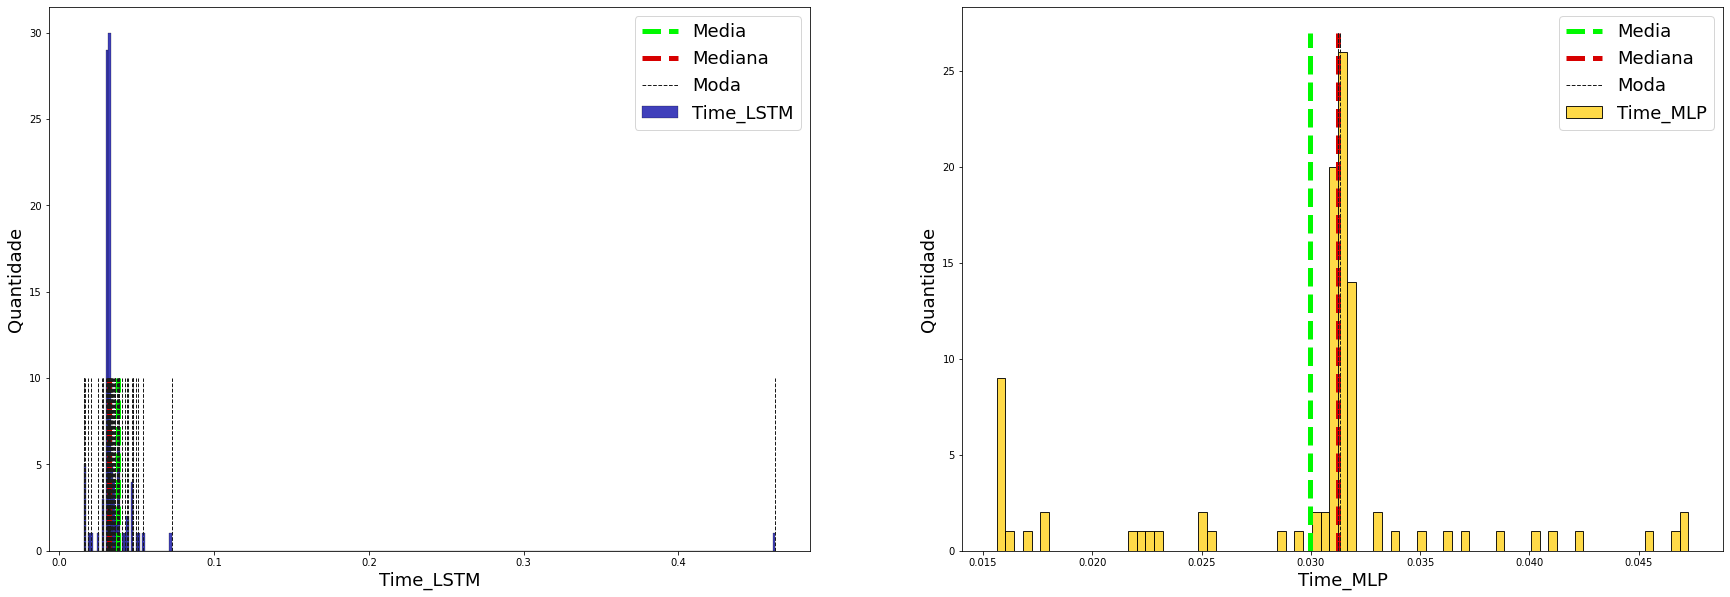

In [14]:
plot_hist(data[:], cols=['Time_LSTM','Time_MLP'],color_hist=[colors[1],colors[-2]],max_hist=[10,27])

**Portanto, podemos observar que ambas as distribuições diferem de uma normal**

In [15]:
U1, p = mannwhitneyu(data['Time_LSTM'].values,data['Time_MLP'].values,alternative="greater")
print("p_value:",p)

p_value: 2.5353161085241863e-07


In [16]:
U1, p = mannwhitneyu(data['Erro_MLP'].values,data['Erro_LSTM'].values,alternative="greater")
print("p_value:",p)

p_value: 9.464967200407016e-06


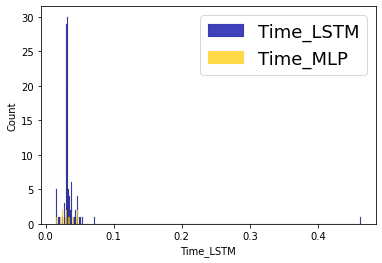

In [17]:
fig, ax = plt.subplots(1,1)
sns.histplot(data, x='Time_LSTM',color=colors[1],ax=ax)
sns.histplot(data, x='Time_MLP',color=colors[-2],ax=ax)
# ax.set_xlim(0.01, 0.08)
plt.legend(["Time_LSTM", "Time_MLP"],fontsize=18)